In [1]:
# imports

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import set_config

np.random.seed(42)
plt.style.use('seaborn-v0_8')

In [2]:
# loading data into dataframe
toyota_df = pd.read_csv('/Users/anilthapa/Documents/Datasets/Data-Science Class/toyota.csv')

In [3]:
# general over view of the dataframe
toyota_df.head(n = 8)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016.0,16000.0,Manual,24089.0,Petrol,265.0,36.2,2.0
1,GT86,2017.0,15995.0,Manual,18615.0,Petrol,145.0,36.2,2.0
2,GT86,2015.0,13998.0,Manual,27469.0,Petrol,265.0,36.2,2.0
3,GT86,2017.0,18998.0,Manual,14736.0,Petrol,150.0,36.2,2.0
4,GT86,2017.0,17498.0,Manual,36284.0,Petrol,145.0,36.2,2.0
5,GT86,2017.0,15998.0,Manual,26919.0,Petrol,260.0,36.2,2.0
6,GT86,2017.0,18522.0,Manual,10456.0,Petrol,145.0,36.2,2.0
7,GT86,2017.0,18995.0,Manual,12340.0,Petrol,145.0,36.2,2.0


In [4]:
# check the null values 
toyota_df.isnull().any()

model           True
year            True
price           True
transmission    True
mileage         True
fuelType        True
tax             True
mpg             True
engineSize      True
dtype: bool

It seems that every input columns have missing values

In [5]:
missing_value_index = toyota_df[toyota_df.isnull().any(axis = 1)].index
print(missing_value_index)

Index([307, 807, 1196, 1411, 2987, 2991, 4743, 6223, 6597], dtype='int64')


These are the index of missing values

In [6]:
missing_value_record = toyota_df.loc[missing_value_index]
missing_value_record

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
307,Corolla,NaN,25990.0,Automatic,1112.0,NaN,135.0,53.3,NaN
807,RAV4,2015.0,NaN,NaN,45000.0,Diesel,78.0,45.0,2.0
1196,Yaris,NaN,10698.0,Manual,NaN,NaN,30.0,55.0,1.3
1411,Yaris,NaN,7295.0,Manual,NaN,NaN,30.0,58.0,NaN
2987,Auris,NaN,15990.0,NaN,12300.0,Hybrid,135.0,80.7,1.8
2991,Auris,2014.0,11490.0,Automatic,48125.0,Hybrid,0.0,NaN,1.8
4743,NaN,2017.0,NaN,Manual,41600.0,Petrol,0.0,68.9,1.0
6223,Prius,NaN,NaN,Automatic,33875.0,Hybrid,NaN,NaN,NaN
6597,Hilux,NaN,30500.0,NaN,NaN,Diesel,260.0,NaN,2.4


Our strategy here is simple. That is if the record contains more than one missing value.
We can drop the record. Given that we have enough number of records, we do not have to worry about dropping few number of records

In [7]:
toyota_df.dropna(thresh = len(toyota_df.columns)-1, inplace=True)

Here we have dropped all the records that contain more than one null values

In [8]:
# checking if we still have null values
toyota_df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg              True
engineSize      False
dtype: bool

In [9]:
print(toyota_df[toyota_df.isnull().any(axis=1)])

       model    year    price transmission  mileage fuelType  tax  mpg  \
2991   Auris  2014.0  11490.0    Automatic  48125.0   Hybrid  0.0  NaN   

      engineSize  
2991         1.8  


There is still one null values in the dataframe. However, we do not have to worry about it. We can now go forth and drop it too.

In [10]:
# Here we have dropped all the null values.
toyota_df.dropna(inplace=True)

In [11]:
toyota_df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

Now our dataset if free of null values

In [12]:
# Now handling duplicates values
duplicates = toyota_df.duplicated()
toyota_df[duplicates]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
178,Corolla,2019.0,17960.0,Manual,4500.0,Petrol,145.0,39.2,1.2
286,Corolla,2019.0,15991.0,Manual,10.0,Petrol,145.0,39.2,1.2
397,RAV4,2016.0,17495.0,Automatic,58100.0,Hybrid,20.0,55.4,2.5
398,RAV4,2017.0,16295.0,Manual,34633.0,Diesel,125.0,60.1,2.0
446,RAV4,2014.0,10999.0,Manual,57942.0,Diesel,145.0,53.0,2.0
459,RAV4,2015.0,13500.0,Manual,45757.0,Diesel,125.0,57.6,2.0
460,RAV4,2015.0,13500.0,Manual,45757.0,Diesel,125.0,57.6,2.0
764,RAV4,2016.0,18795.0,Automatic,57000.0,Hybrid,20.0,55.4,2.5
1179,Yaris,2016.0,10495.0,Automatic,33705.0,Hybrid,0.0,86.0,1.5
1415,Yaris,2016.0,9495.0,Automatic,26191.0,Petrol,30.0,58.0,1.3


After going through it, the only duplicated value are:
     459 & 460
     4283 & 4284 
     4516 & 4517
     5488 & 5489
The rest are not duplicates value but different observations. Dropping only these duplicated values

In [13]:
index_to_drop =[460, 4284, 4517, 5489]
toyota_df.drop(index_to_drop, inplace=True)

In [14]:
toyota_df.drop(toyota_df[toyota_df['engineSize'] == 0].index, inplace=True)

From our domain knowledge, there is no engineSize of value 0. So, we drop the record where the enginesize is 0.

In [15]:
toyota_df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [16]:
toyota_df.drop(toyota_df[toyota_df['transmission'] == 'Other'].index, inplace= True)

Here we can drop Other types of transmission. Because we are dealing with toyota engines. They 99 percent of toyota engines comes from only three options: Manual, Automatic, Semi-Auto

In [17]:
toyota_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [18]:
toyota_df = toyota_df[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType','engineSize', 
       'mpg']]

Rearranging our columns in a dataframe because mpg is our target variable. Further, we dropped tax columns because it can be derived from price column, thereby reducing the dimension of input features.

In [19]:
# Now creating box plot of the numerical features
numerical_features = ['year', 'price', 'mileage', 'engineSize', 'mpg']

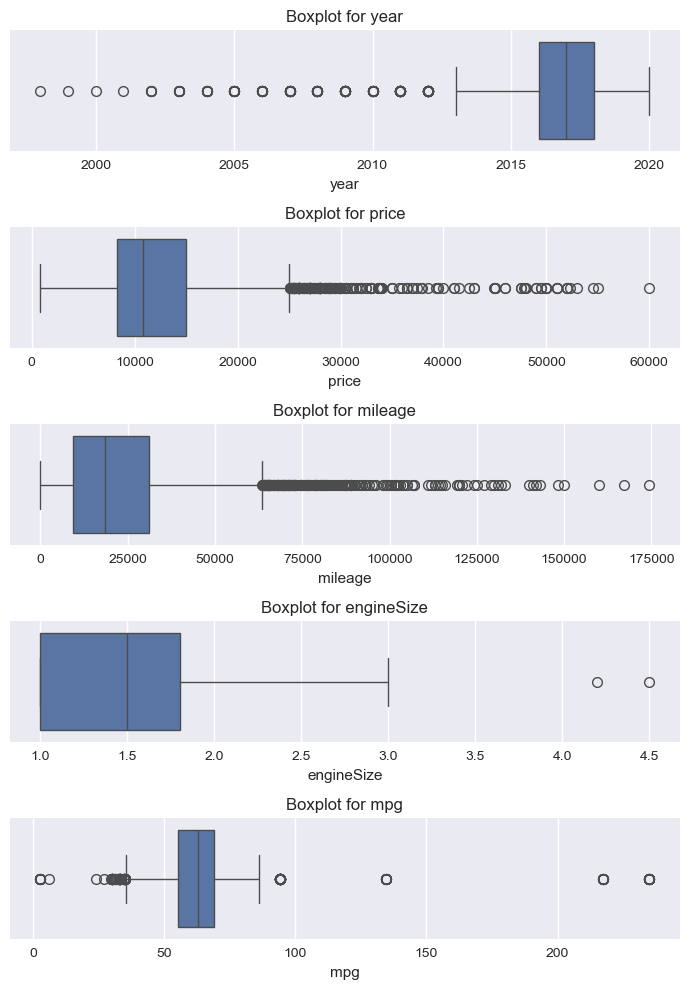

In [20]:
fig1, ax1 = plt.subplots(nrows= 5, ncols=1, figsize = (7,10))
for i, feature in enumerate(numerical_features):
    sns.boxplot(toyota_df[feature], orient='h', ax = ax1[i])
    ax1[i].set_xlabel(feature)
    ax1[i].set_title('Boxplot for '+feature)

plt.tight_layout()
plt.show()

This is the general view of the datasets. Now we display each boxplot and then study the outliers in details

In [21]:
toyota_numerical = toyota_df[['year', 'price', 'mileage','engineSize', 'mpg']]

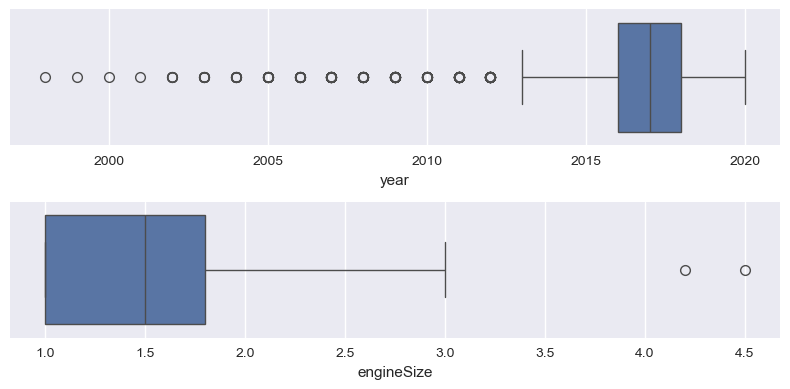

In [22]:
fig, ax =plt.subplots(2, 1, figsize = (8,4))
sns.boxplot(toyota_numerical['year'], orient='h', ax =ax[0])
sns.boxplot(toyota_numerical['engineSize'], orient='h', ax=ax[1])
plt.tight_layout()
plt.show()

From our domain knowledge, 
1. we do not drop the outliers (engine size and year) because our model needs to learn about the old vehicles too. In the case where the model has not learnt about old vehicles. it will be biased.
2. In the second boxplot, we do have couple of instances of engize of 4.2 and 4.5. We would like to keep them and train our model

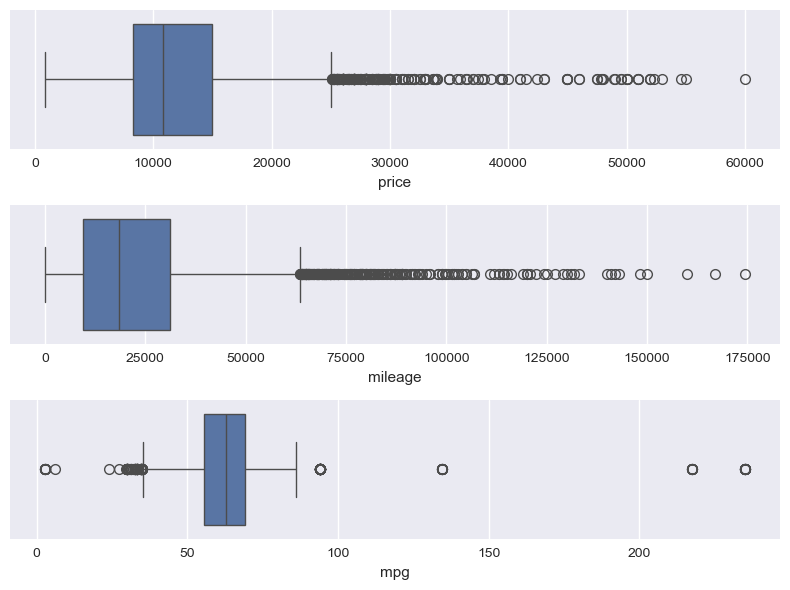

In [23]:
fig, ax = plt.subplots(3,1, figsize = (8, 6))
sns.boxplot(toyota_numerical['price'], orient='h', ax =ax[0])
sns.boxplot(toyota_numerical['mileage'], orient='h', ax =ax[1])
sns.boxplot(toyota_numerical['mpg'], orient='h', ax =ax[2])
plt.tight_layout()
plt.show()

Now, we have three remaining numerical features. Here, we can go and drop the outliers straighforward.

In [24]:
toyota_df = toyota_df[
    (toyota_df['price'] >= toyota_df['year'].quantile(0.2)) & (toyota_df['year'] <= toyota_df['year'].quantile(0.8))&
    (toyota_df['mileage'] >= toyota_df['mileage'].quantile(0.2)) & (toyota_df['mileage'] <= toyota_df['mileage'].quantile(0.8))&
    (toyota_df['mpg'] >= toyota_df['mpg'].quantile(0.2)) & (toyota_df['mpg'] <= toyota_df['mpg'].quantile(0.8))
]

Here we have dropped all the outliers(in vehicle price, mileage and mpg) that are below 20 percent and above 80 percent.

<Axes: >

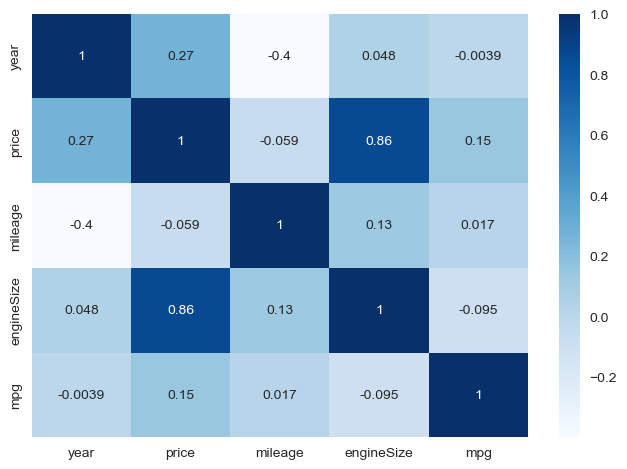

In [25]:
toyota_numerical = toyota_df[['year', 'price', 'mileage', 'engineSize', 'mpg']]
sns.heatmap(toyota_numerical.corr(), annot=True, cmap='Blues')

From the above seaborn heatmap, it is clear that there is a significant positive correlation between engine size and the price of the vehicle, while the rest of the data does not have seem to coorelated to each other. 

While our target variable mpg does not seem to have any king of positive or negative coorelation with any of the input featues

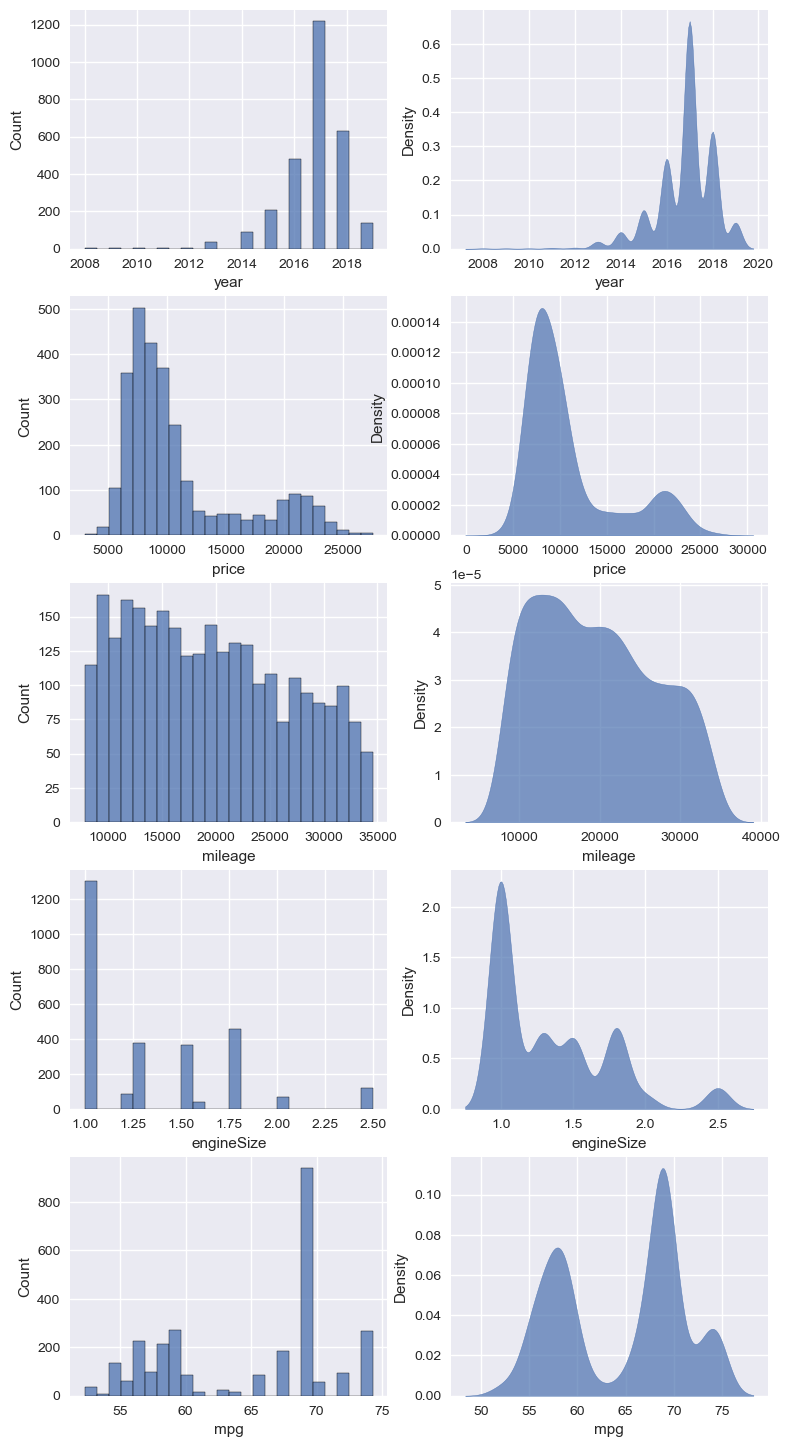

In [26]:
fig2, ax2 = plt.subplots(nrows=5, ncols=2, figsize = (9, 18))
for i, feature in enumerate(numerical_features):
    sns.histplot(toyota_df[feature], bins = 24, ax = ax2[i, 0])
    sns.kdeplot(toyota_df[feature], fill=True, alpha = 0.7, ax = ax2[i, 1])
    
#plt.tight_layout()
plt.show()

Given that none of the input numerical features seems to have normally distributed values, which seems to be troublesome if we were not heading towards regression task. Our main goal here is regression. The main underlying assumption for regression tasks is that noise should be distributed normally; however the input features not necessarily follow a normal distribuion and, thus, not be bothered about the distribution of the data

In [27]:
# now seeing the categorical features
categorical_features = toyota_df[['model', 'transmission', 'fuelType']]

In [28]:
categorical_features['model'].unique()

array([' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Camry', ' IQ'], dtype=object)

In [29]:
categorical_features['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [30]:
categorical_features['fuelType'].unique()

array(['Hybrid', 'Diesel', 'Petrol', 'Other'], dtype=object)

Here all our categorical features are nominal features. Such as no particular order between petrol or diesel, also no particular order between the transmission types.

# Visualization Experiment of input features with output features.

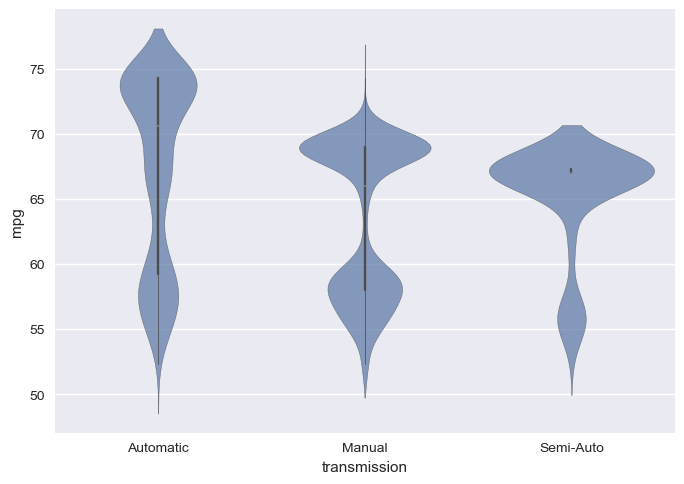

In [46]:
sns.violinplot(x = toyota_df['transmission'], y = toyota_df['mpg'], alpha = 0.7)
plt.show()

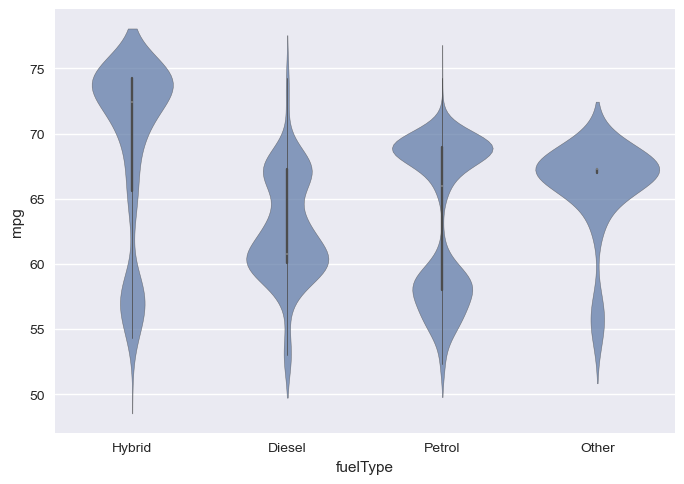

In [48]:
sns.violinplot(x = toyota_df['fuelType'], y= toyota_df['mpg'], alpha = 0.7)
plt.show()

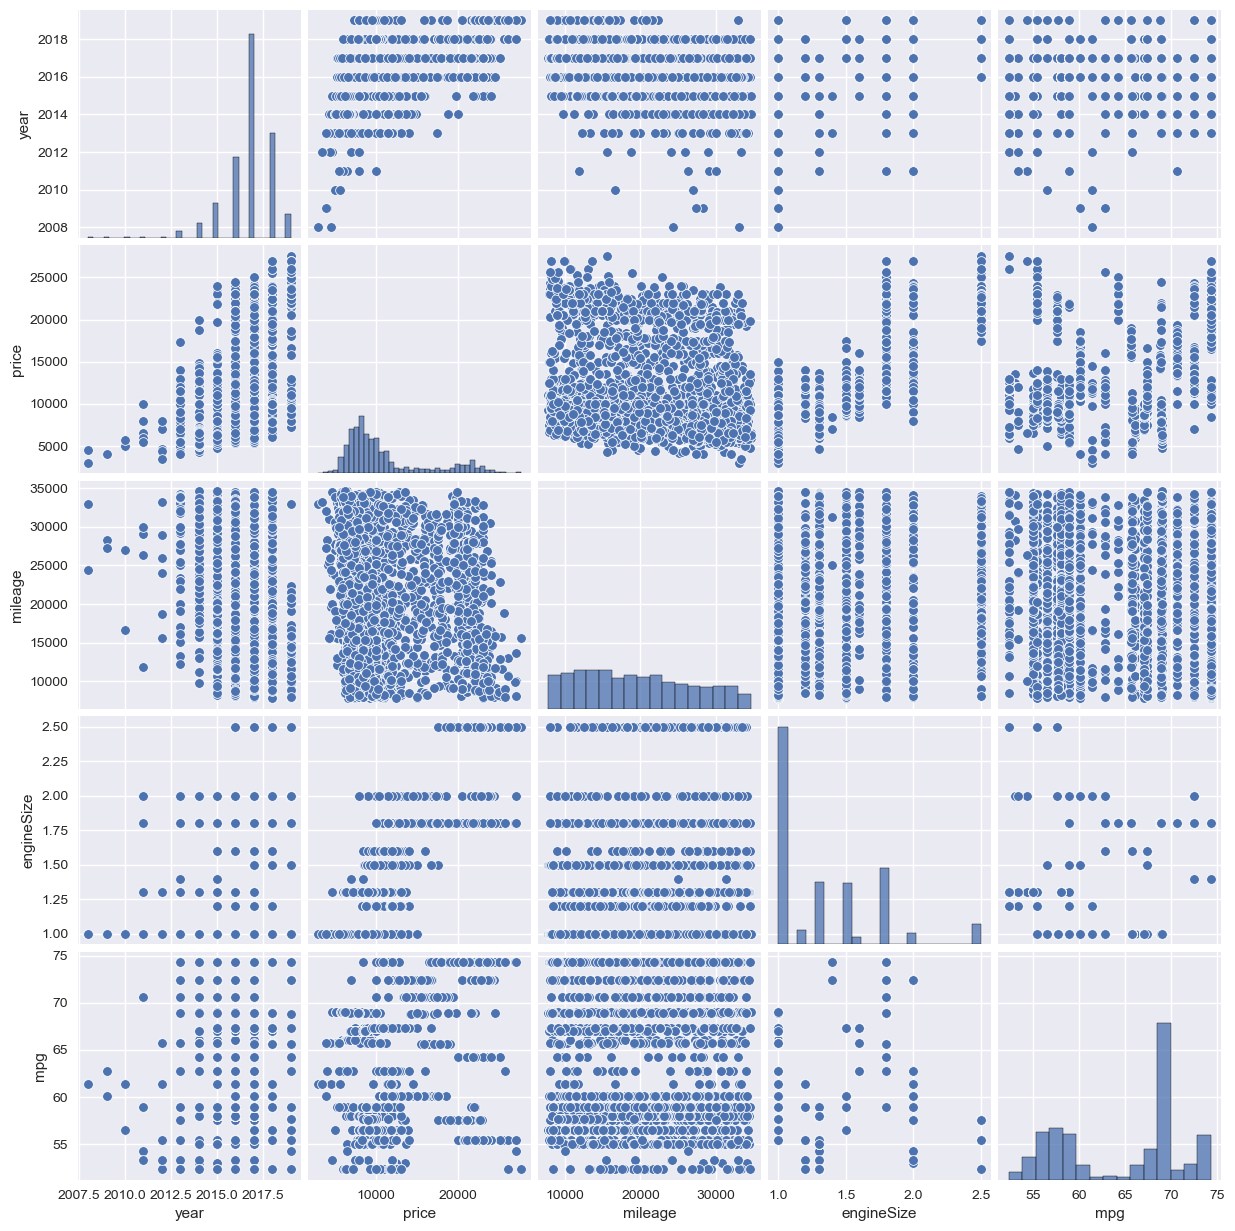

In [45]:
sns.pairplot(toyota_df)
plt.show()

Here, we have visually explored relationships in general between multiple variables in a dataset. This is the general overview of the data. The diagonal represents the histogram between the two input features. The non-diagonal subplot represents the scatterplot between the two features. Here we generally do not see any visually significant relationship between the features - meaning there could be no or very little linear correlation between two features or there could be non-linear relationship not captured by two dimensional plotting or two features could be independent or we could possibly combine two or more variables to reveal the hidden insights

## Pipelines

Here we have used pipeline. Pipeline is a way to streamline a lot of routine process, proving a convenient interface for creating and managing complex workflows. In this case, we have used pipeline to encode categorical variables, standardize our features, and apply the pipeline only to some features. 

In [34]:
categorical_pipeline = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [35]:
numerical_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipeline, ['model', 'transmission', 'fuelType']),
        ('numerical', numerical_pipeline, ['year', 'price', 'mileage', 'engineSize'])
    ]
)

In [37]:
X = preprocessor.fit_transform(toyota_df[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'engineSize']])
y = StandardScaler().fit_transform(toyota_df['mpg'].values.reshape(-1,1))

Here, we split the data in training and testing phase. Our train size is 80%, while the testing size is 20%. 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Lasso Model

Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique used in linear regression and other linear models. The main motive behind using Lasso here, instead of base linear regression or Ridge Regression is because Lasso also performs feature selection. Previoiusly, we have not done feature selection in our preprocessing step. Further the regularization also prevents the overfitting of the model. The alpha represents the learning parameter.

In [39]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_predict = lasso_model.predict(X_test)

In [40]:
print('Metrics: Lasso Model')
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict))

Metrics: Lasso Model
Mean Squared Error:  0.2893090775199904
Mean Absolute Error:  0.3901157198849144


## SVR Model

Support Vector Regression (SVR) is another regression algorithm from SVM family. The reason for using SVR is simple. Support Vector Machine works is one of the most powerful and versatile class of algorithm. It is effective in higher dimension and works very well with non-linear boundaries. The kernel function we have used is Radial Basis Function, which is by the way default value for kernel. 

In [41]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train.ravel())
y_predict = svr.predict(X_test)

In [42]:
print('Metrics: Support Vector Regressor Model')
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict))

Metrics: Support Vector Regressor Model
Mean Squared Error:  0.12485773179743431
Mean Absolute Error:  0.18745951885549209


## Random Forest Regression

Random Forest Regression is an ensemble learning algorithm that is based on the Random Forest Algorithm. A Random Forest is an ensemble of decision trees. We have used default value number of estimator, while the maximum depth of the trees, after experimentation, 10 turned out to be optimal value.

In [43]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state=42)
rf_regressor.fit(X_train, y_train.ravel())
y_predict = rf_regressor.predict(X_test)

In [44]:
print('Metrics: Random Forest Regressor Model')
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict))

Metrics: Random Forest Regressor Model
Mean Squared Error:  0.0931692069622386
Mean Absolute Error:  0.14107754728092348
